In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the dataset
# url = 'https://app.noteable.io/f/92d224c2-e070-4cf4-99a4-6965cc5b47b6/forecasting_case_study.csv'
data = pd.read_csv('/Users/xiruixiang/Downloads/Data Glacier Intern/Projects/forecasting_case_study.csv')
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [3]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


In [4]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Remove '%' symbol and convert 'Price Discount (%)' column to float
data['Price Discount (%)'] = data['Price Discount (%)'].str.replace('%', '').astype(float)

# Check the data types again
data.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)           float64
In-Store Promo                 int64
Catalogue Promo                int64
Store End Promo                int64
Google_Mobility              float64
Covid_Flag                     int64
V_DAY                          int64
EASTER                         int64
CHRISTMAS                      int64
dtype: object

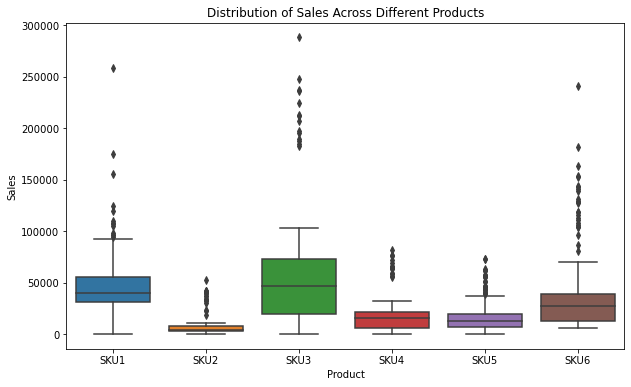

In [5]:
# Plot the distribution of sales across different products
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Sales', data=data)
plt.title('Distribution of Sales Across Different Products')
plt.show()

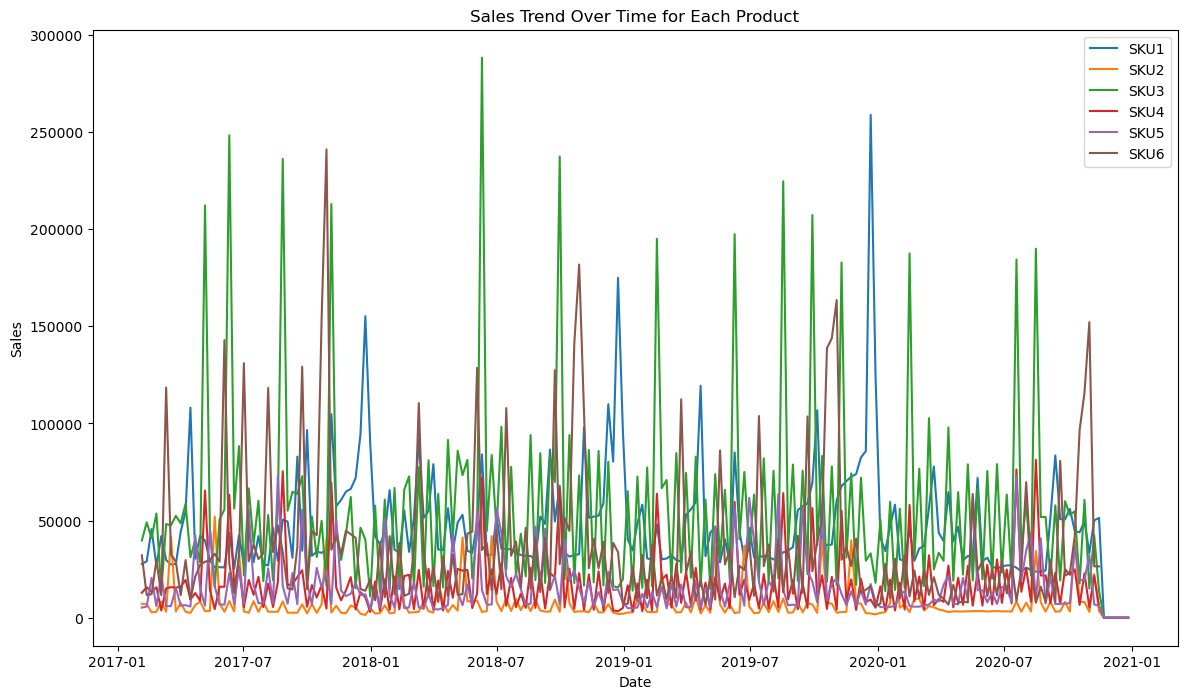

In [ ]:
# Plot the trend of sales over time for each product
plt.figure(figsize=(14, 8))
for product in data['Product'].unique():
    product_data = data[data['Product'] == product]
    plt.plot(product_data['date'], product_data['Sales'], label=product)
plt.title('Sales Trend Over Time for Each Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

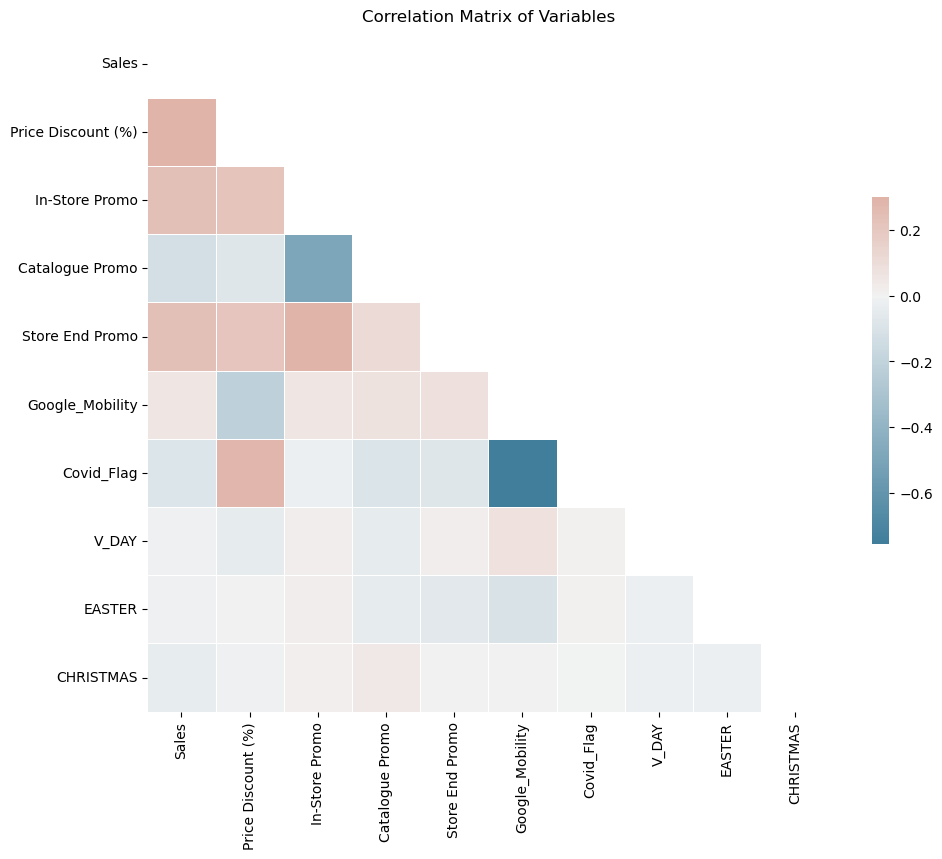

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Convert 'Product' column to one-hot encoding
encoder = OneHotEncoder(sparse=False)
product_encoded = encoder.fit_transform(data[['Product']])
product_encoded_df = pd.DataFrame(product_encoded, columns=encoder.get_feature_names(['Product']))

# Concatenate the original data and the one-hot encoded columns
data_encoded = pd.concat([data, product_encoded_df], axis=1).drop('Product', axis=1)

# Split the data into a training set and a test set
train, test = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Separate the target variable (Sales) from the features
X_train = train.drop('Sales', axis=1)
y_train = train['Sales']
X_test = test.drop('Sales', axis=1)
y_test = test['Sales']

# Check the shapes of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974, 16), (974,), (244, 16), (244,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Compute the Mean Absolute Error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Compute the Root Mean Squared Error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
# Convert 'date' column to the number of days since the first date
X_train['date'] = (X_train['date'] - X_train['date'].min()).dt.days
X_test['date'] = (X_test['date'] - X_train['date'].min()).dt.days

# Train the model again
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
# Convert 'date' column to ordinal representation
X_train['date'] = X_train['date'].apply(lambda x: x.toordinal())
X_test['date'] = X_test['date'].apply(lambda x: x.toordinal())

# Train the model again
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

AttributeError: 'int' object has no attribute 'toordinal'

In [ ]:
# Revert 'date' column back to datetime format
X_train['date'] = pd.to_datetime(X_train['date'], origin='unix', unit='s')
X_test['date'] = pd.to_datetime(X_test['date'], origin='unix', unit='s')

# Convert 'date' column to ordinal representation
X_train['date'] = X_train['date'].apply(lambda x: x.toordinal())
X_test['date'] = X_test['date'].apply(lambda x: x.toordinal())

# Train the model again
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(13624.08347635932, 20584.341058148475)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(7052.382550803157, 17263.042504586207)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(7503.4701138293585, 15624.369357879292)

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=207fb0d6f49cdfeaacc780435e78ee62fb1d49bb1f21f65aa275d7f831183d9c
  Stored in directory: /home/noteable/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 60.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480503 sha256=c2964603e97ad8ee071368d23573e94e84d6ed4f0d7e4b7a1630d074f381c7ae
  Stored in directory: /home/noteable/.cache/pip/wheels/e5/6c/70/7c6be85fa56f05480fe043bdf0d4f6ec316b122be21e098066
Successfully built jax
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.5
    Uninstalling grpcio-1.47.5:
      Successfully uninstalled grpcio-1.47.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flytekit 1.2.11 requires grpcio!=1.45.0,<1.49.1,<2.0,>=1.43.0, but you have grpcio 1.54.2 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Add an input layer and a hidden layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Add an output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model using the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Compute the MAE and RMSE of the predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

2023-05-25 07:25:15.226997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 07:25:15.294241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 07:25:15.294878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 07:25:16.336082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


8/8 [==============================] - 0s 1ms/step


(20972.181224385247, 28616.467022307395)

In [6]:
!pip install pyspark
!pip install tensorflowonspark

     |████████████████████████████████| 310.8 MB 9.5 kB/s  eta 0:00:012  |█▌                              | 14.2 MB 4.5 MB/s eta 0:01:07     |██                              | 19.4 MB 4.5 MB/s eta 0:01:05     |███▏                            | 30.5 MB 17.9 MB/s eta 0:00:16     |████                            | 38.2 MB 17.9 MB/s eta 0:00:16     |████████▉                       | 86.0 MB 93.3 MB/s eta 0:00:03     |██████████▎                     | 99.3 MB 93.3 MB/s eta 0:00:03
     |████████████████████████████████| 200 kB 21.7 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=f33903ff1ca0ccb48a0e68b6565a9f34f335b15cab00fa7ed7c9e948432387a3
  Stored in directory: /Users/xiruixiang/Library/Caches/pip/wheels/27/3e/a7/888155c6a7f230b13a394f4999b90fdfaed00596c68d3de307
Successfully built pyspark
     |████████████████████████████████| 45 kB 2.0 MB/s eta 0:00:011


In [7]:
pip install elephas

     |████████████████████████████████| 18.1 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 281.3 MB 75 kB/s  eta 0:00:011    |████▎                           | 37.5 MB 32.1 MB/s eta 0:00:08MB/s eta 0:00:03     |███████████████████████████████▊| 278.9 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 988 kB 32.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 133 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 242 kB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 39.0 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=13952a0106d59b8cc21d18361aafaca001ebcd90e8cf6145ca452f567ae2b2d3


  Stored in directory: /Users/xiruixiang/Library/Caches/pip/wheels/1d/27/68/1382001655ef41217e1dd34d59aa777612135379bab64279e9
Successfully built pyspark
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: Jinja2
    

In [9]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from elephas.ml_model import ElephasEstimator
from keras.models import Sequential
from keras.layers import Dense

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:511: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [11]:


# Assemble features into a single column
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)

# Split the data into a training set and a test set
train, test = data.randomSplit([0.7, 0.3])

# Define the Keras model
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Convert the Keras model to an ElephasEstimator
estimator = ElephasEstimator()
estimator.set_keras_model_config(model.to_yaml())
estimator.set_optimizer_config(optimizer.get_config())
estimator.set_mode("synchronous")
estimator.set_loss("mean_squared_error")
estimator.set_metrics(["mae"])
estimator.set_epochs(50)
estimator.set_batch_size(32)
estimator.set_validation_split(0.1)
estimator.set_categorical_labels(False)

# Train the model
estimator.fit(train)

# Make predictions on the test data
predictions = estimator.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


AssertionError: 

In [13]:
!pip install numpy==1.19


     |████████████████████████████████| 15.3 MB 73 kB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.5.0 requires h5py~=3.1.0, but you'll have h5py 3.8.0 which is incompatible.
tensorflow 2.5.0 requires numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
pandas 2.0.1 requires numpy>=1.20.3; python_version < "3.10", but you'll have numpy 1.19.0 which is incompatible.
fastparquet 2023.2.0 requires numpy>=1.20.3, but you'll have numpy 1.19.0 which is incompatible.
elephas 4.1.0 requires numpy==1.23.5, but you'll have numpy 1.19.0 which is incompatible.
das

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from elephas.ml_model import ElephasEstimator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder.appName('deep_learning').getOrCreate()

# Convert the pandas DataFrame to a Spark DataFrame
spark_df = spark.createDataFrame(data)

# Convert all features to a single column of vectors
assembler = VectorAssembler(inputCols=data.columns.drop('Sales'), outputCol='features')
spark_df = assembler.transform(spark_df)

# Initialize a Sequential model
model = Sequential()
model.add(Dense(32, input_dim=len(data.columns)-1, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Initialize an ElephasEstimator
estimator = ElephasEstimator()
estimator.set_keras_model_config(model.to_yaml())
estimator.set_num_workers(1)
estimator.set_epochs(50)
estimator.set_batch_size(32)
estimator.set_verbosity(0)
estimator.set_validation_split(0.2)
estimator.set_categorical_labels(False)
estimator.set_loss('mean_squared_error')
estimator.set_optimizer('adam')

# Fit the model to the data
fitted_model = estimator.fit(spark_df)


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:511: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations